 Cardiology Unit Admission Analysis
## CSE 475 - Machine Learning Assignment
### Group F Members:
- Prinom Mojumder (2021-2-60-098)
- Md. Parvez Mia (2021-3-60-093)
- Jannatul Adan Mahi (2021-3-60-240)
- Sourav Hasan (2021-3-60-116)


In [ ]:
!pip install xgboost shap lime
!pip install scikit-learn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1f6e88356a284a911d976ee7c7adf09f45c8d191e97cbd4485d55d79a6dfd9b7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import lime.lime_tabular
from sklearn.model_selection import cross_val_score

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE475/cw_22_23_24.csv')

# Display dataset info
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

"""### Data Preprocessing"""

# Handle missing values
df_cleaned = df.dropna()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9573 entries, 0 to 9572
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   adm_type    9573 non-null   object
 1   shift_from  9573 non-null   object
 2   ssc         9573 non-null   object
 3   yr_nae      9573 non-null   int64 
 4   m_no        9573 non-null   int64 
 5   mrn         9573 non-null   object
 6   pt_name     9573 non-null   object
 7   sex         9573 non-null   object
 8   disease     7481 non-null   object
 9   D.O.A       9573 non-null   object
 10  D.O.D       9573 non-null   object
 11  status      9573 non-null   object
 12  consultant  9573 non-null   object
 13  L.O.S       9573 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 1.0+ MB
None

First few rows:
     adm_type shift_from ssc  yr_nae  m_no       mrn          pt_name sex  \
0  Shift From         ER  No       1     1  21845698        Hara Bibi   F   
1  Shift Fro

In [ ]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Define features and target
target_column = 'status'  # Replace 'status' with the correct target column if different
if target_column not in df_cleaned.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-26-a21e3ea6d653>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-26-a21e3ea6d653>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-26-a21e3ea6d653>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or


##Exploratory Data Analysis

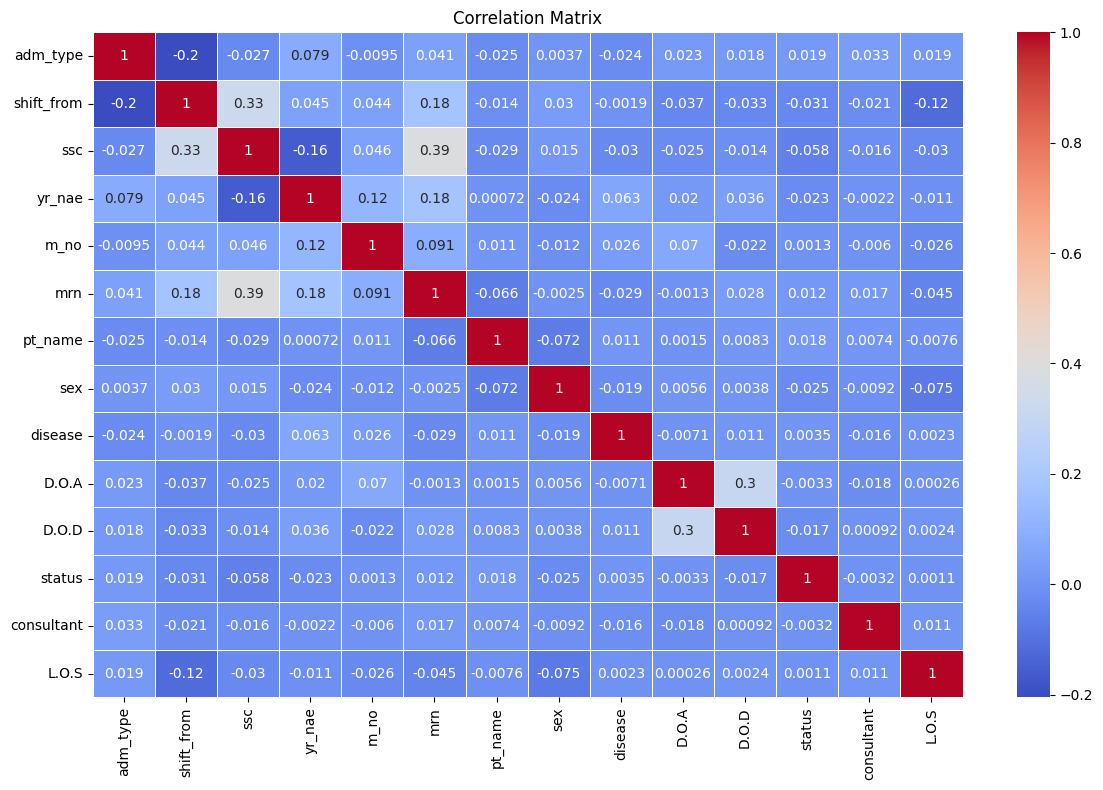

<ipython-input-27-9f27604d1315>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


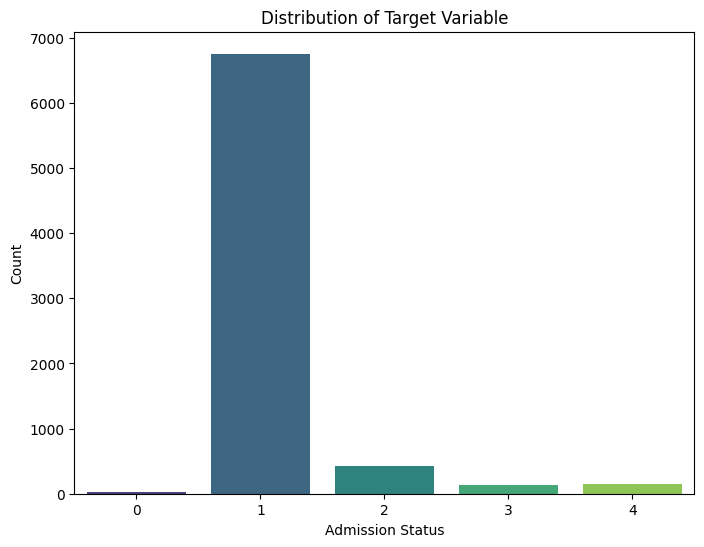

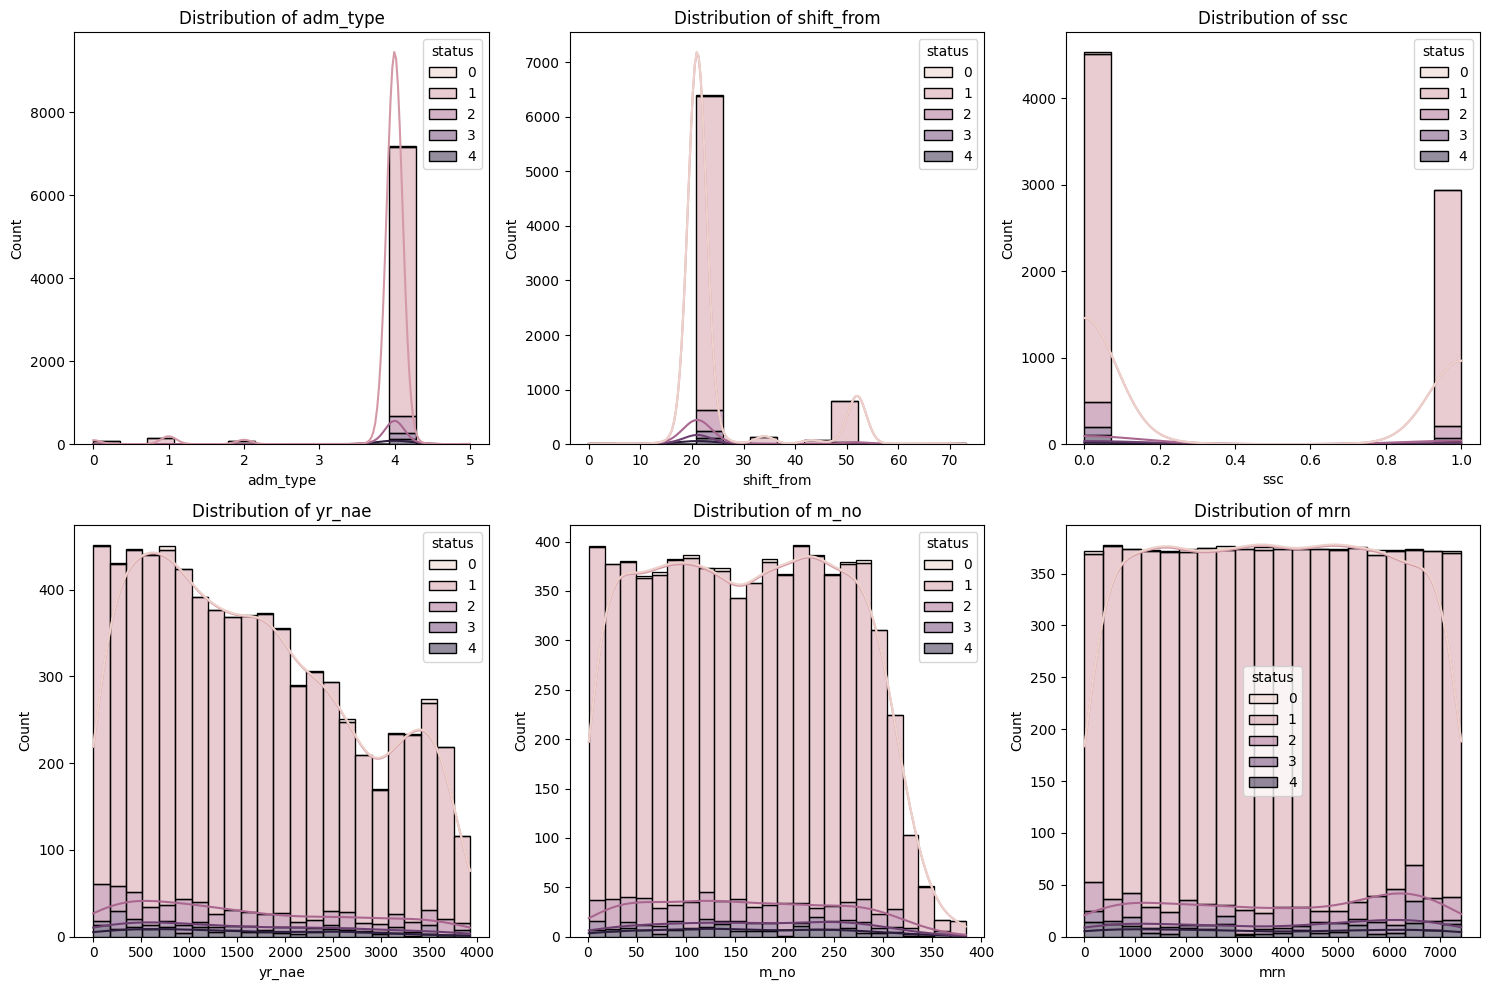

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Admission Status')
plt.ylabel('Count')
plt.show()

# Feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns[:6], 1):  # Limited to first 6 features for readability
    plt.subplot(2, 3, i)
    sns.histplot(data=df_cleaned, x=col, hue=target_column, multiple="stack", kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## 2. Ensemble Learning Implementation


In [ ]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

### 2.1 Bagging: Random Forest


Random Forest:
Accuracy: 0.911
Precision: 0.851
Recall: 0.911
F1 Score: 0.872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


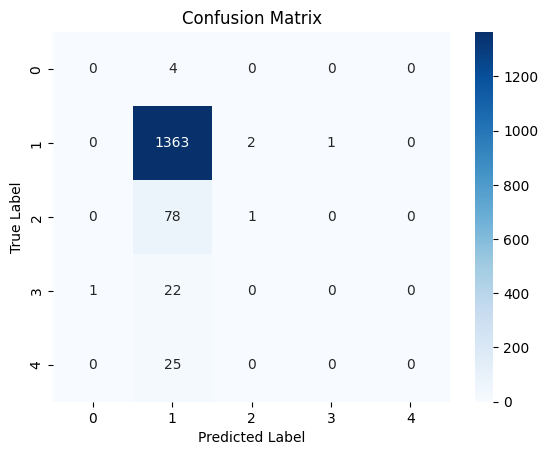

In [ ]:
print("\nRandom Forest:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
evaluate_model(rf_model, X_test_scaled, y_test)

### 2.2 Boosting: Gradient Boosting




Gradient Boosting:
Accuracy: 0.899
Precision: 0.845
Recall: 0.899
F1 Score: 0.868


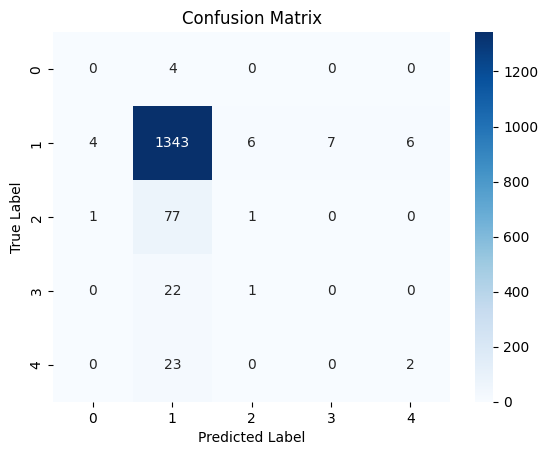

In [ ]:
print("\nGradient Boosting:")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
evaluate_model(gb_model, X_test_scaled, y_test)

### 2.3 Stacking



Stacking:
Accuracy: 0.908
Precision: 0.847
Recall: 0.908
F1 Score: 0.870


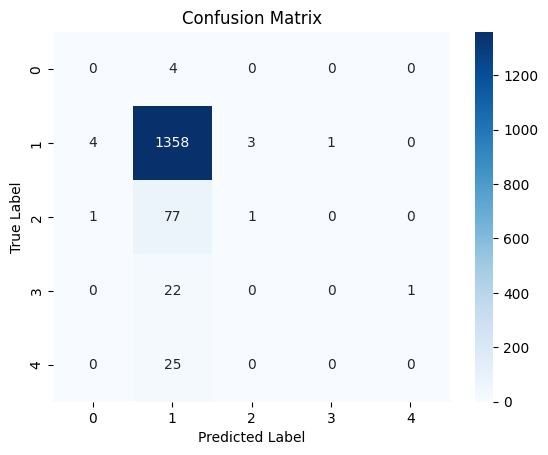

In [ ]:
print("\nStacking:")
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]
meta_model = LogisticRegression()
meta_features_train = np.column_stack([model.fit(X_train_scaled, y_train).predict(X_train_scaled) for _, model in base_models])
meta_features_test = np.column_stack([model.predict(X_test_scaled) for _, model in base_models])
meta_model.fit(meta_features_train, y_train)
evaluate_model(meta_model, meta_features_test, y_test)

### 2.4 Voting Classifier



Voting Classifier:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.905
Precision: 0.850
Recall: 0.905
F1 Score: 0.869


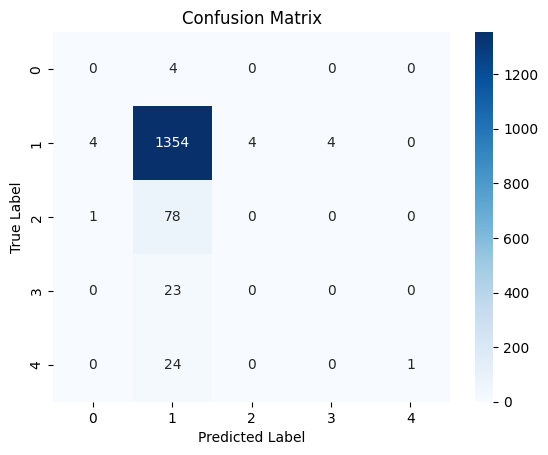

In [ ]:
print("\nVoting Classifier:")
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('ada', AdaBoostClassifier(random_state=42))
    ],
    voting='soft'
)
voting_clf.fit(X_train_scaled, y_train)
evaluate_model(voting_clf, X_test_scaled, y_test)

##Cross-Validation:


Cross-validating Stacking...
Stacking - Mean Accuracy: 0.959, Std Deviation: 0.001

Cross-validating Random Forest...
Random Forest - Mean Accuracy: 0.897, Std Deviation: 0.001

Cross-validating Gradient Boosting...
Gradient Boosting - Mean Accuracy: 0.890, Std Deviation: 0.004

Cross-validating Voting Classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Voting Classifier - Mean Accuracy: 0.895, Std Deviation: 0.003

Cross-Validation Results:
               Model  Mean Accuracy  Std Deviation
0      Random Forest       0.896892       0.000983
1  Gradient Boosting       0.889705       0.004279
2  Voting Classifier       0.895220       0.003290
3           Stacking       0.958723       0.001467


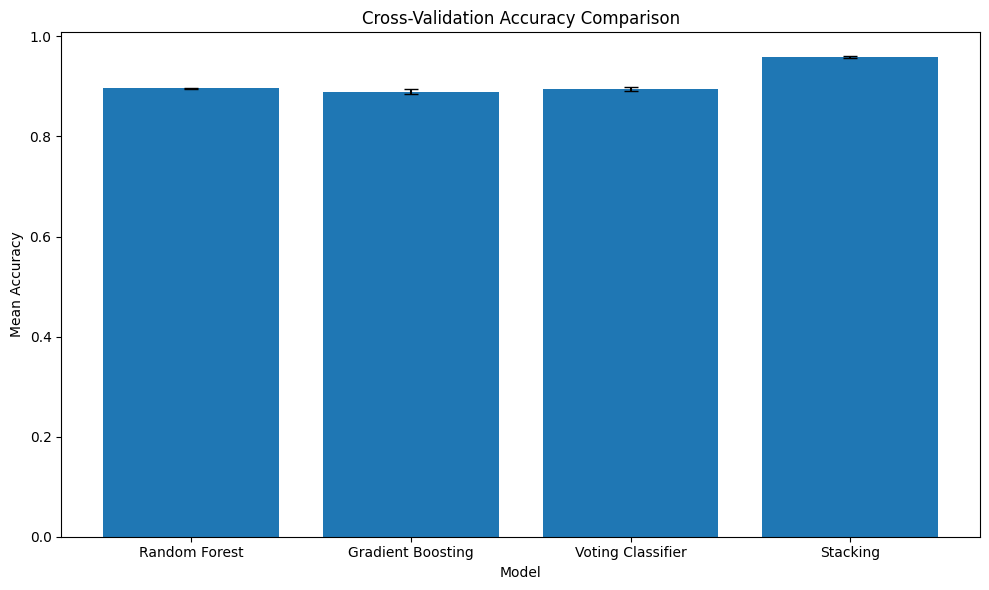

In [ ]:
# Function to perform cross-validation and store scores
def cross_validate_models(models, X, y, cv=5):
    cv_results = []
    for name, model in models.items():
        print(f"\nCross-validating {name}...")
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        cv_results.append({
            'Model': name,
            'Mean Accuracy': scores.mean(),
            'Std Deviation': scores.std()
        })
        print(f"{name} - Mean Accuracy: {scores.mean():.3f}, Std Deviation: {scores.std():.3f}")
    return pd.DataFrame(cv_results)

# Define models for cross-validation
models_cv = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42)),
            ('ada', AdaBoostClassifier(random_state=42))
        ],
        voting='soft'
    )
}

# Prepare stacking separately as it needs meta-features
print("\nCross-validating Stacking...")
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]
meta_model = LogisticRegression()

meta_features_train = np.column_stack([
    model.fit(X_train_scaled, y_train).predict_proba(X_train_scaled)[:, 1]
    for _, model in base_models
])
stacking_scores = cross_val_score(meta_model, meta_features_train, y_train, cv=5, scoring='accuracy')
stacking_result = {
    'Model': 'Stacking',
    'Mean Accuracy': stacking_scores.mean(),
    'Std Deviation': stacking_scores.std()
}
print(f"Stacking - Mean Accuracy: {stacking_scores.mean():.3f}, Std Deviation: {stacking_scores.std():.3f}")

# Perform cross-validation for the rest of the models
cv_results_df = cross_validate_models(models_cv, X_train_scaled, y_train)

# Add Stacking results to the DataFrame
cv_results_df = pd.concat([cv_results_df, pd.DataFrame([stacking_result])], ignore_index=True)

# Display the cross-validation results
print("\nCross-Validation Results:")
print(cv_results_df)

# Plot cross-validation results
plt.figure(figsize=(10, 6))
plt.bar(cv_results_df['Model'], cv_results_df['Mean Accuracy'], yerr=cv_results_df['Std Deviation'], capsize=5)
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Mean Accuracy')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


## 4. Explainable AI


### 4.1 SHAP Analysis


SHAP Analysis for Random Forest:


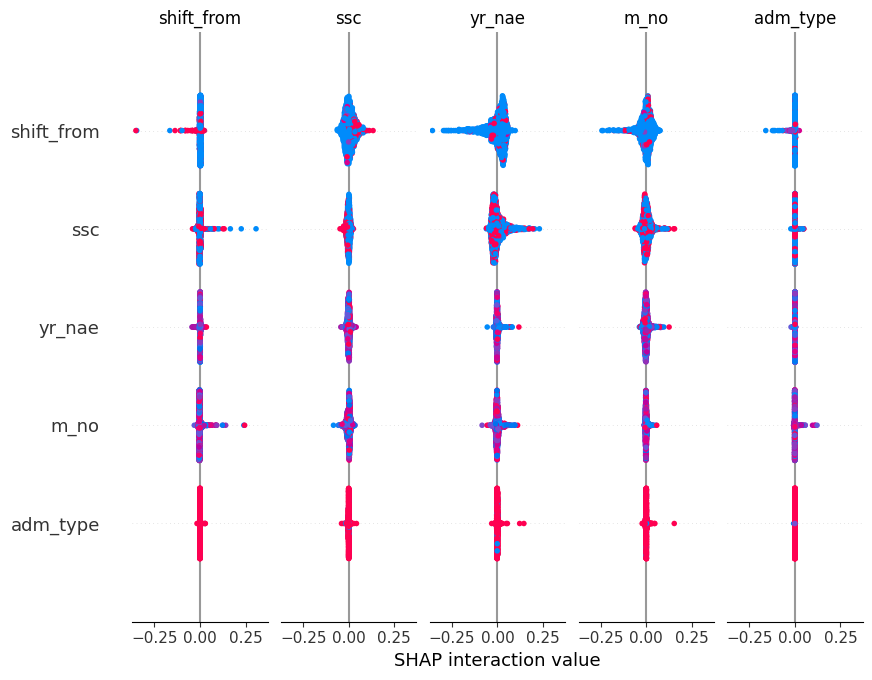

In [ ]:
print("\nSHAP Analysis for Random Forest:")
shap.initjs()
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test_scaled)
shap.summary_plot(shap_values_rf, X_test_scaled, feature_names=X.columns)

### 4.2 LIME Analysis

In [ ]:
# LIME Analysis
print("\nLIME Analysis for Random Forest:")
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled, feature_names=X.columns, class_names=['No Admission', 'Admission'], mode='classification'
)
lime_exp = lime_explainer.explain_instance(X_test_scaled[0], rf_model.predict_proba, num_features=10)
lime_exp.show_in_notebook(show_all=False)



LIME Analysis for Random Forest:


## 5. Performance Analysis


Performance Comparison:
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.911156   0.851187  0.911156  0.871634
1  Gradient Boosting  0.899132   0.844996  0.899132  0.867771
2           Stacking  0.901136   0.845784  0.901136  0.870571
3  Voting Classifier  0.905144   0.849818  0.905144  0.868616
Index(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'], dtype='object')


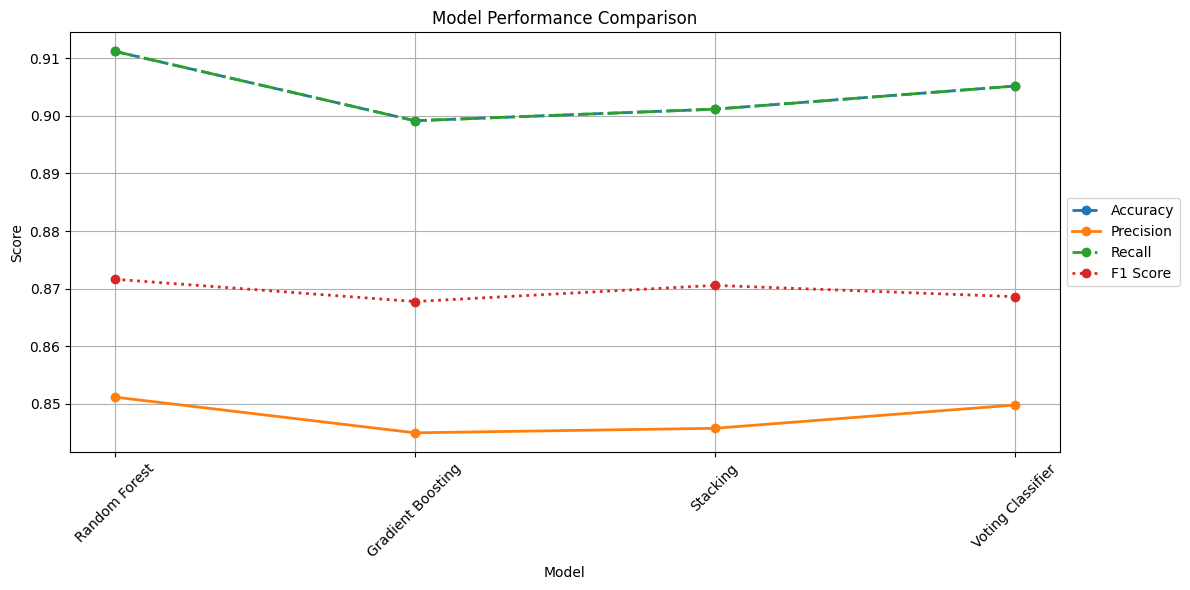

In [ ]:
def compare_models(models, X_test, y_test):
    results = []
    for name, model in models.items():
        if name == "Stacking":
            # Create meta-features for testing
            meta_features_test = np.column_stack([
                model.predict_proba(X_test)[:, 1] for _, model in base_models
            ])
            # Fit the meta_model before prediction
            meta_model.fit(meta_features_train, y_train)  # Assuming you have meta_features_train and y_train from the training process

            # Predict using the trained meta-model (Logistic Regression)
            y_pred = meta_model.predict(meta_features_test)
        else:
            y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
    return pd.DataFrame(results)




models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Stacking': meta_model,
    'Voting Classifier': voting_clf
}


performance_df = compare_models(models, X_test_scaled, y_test)

# Display performance comparison
print("\nPerformance Comparison:")
print(performance_df)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
print(performance_df.columns)  # First check what the actual column names are

# Solution 2: Add slight offset to points and adjust line styles
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    if metric in performance_df.columns:
        plt.plot(performance_df['Model'],
                performance_df[metric],
                marker='o',
                label=metric,
                linestyle=['--', '-', '-.', ':'][i],  # Different line styles
                linewidth=2)  # Make lines thicker

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside
plt.grid(True)
plt.tight_layout()
plt.show()

